# Cernstaff
Playing with a Tree containing variables of type character




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:53 AM.</small></i>

In [1]:
TString dir = gROOT->GetTutorialDir();
dir.Append("/tree/cernstaff.C");
if (gSystem->AccessPathName("cernstaff.root")) {
   gROOT->SetMacroPath(dir);
   gROOT->ProcessLine(".x cernbuild.C");
}
TFile *f = new TFile("cernstaff.root");
TTree *T = (TTree*)f->Get("T");
TCanvas *c1 = new TCanvas("c1","CERN staff",10,10,1000,750);
c1->Divide(2,2);

Make table of number of people per nation & division

In [2]:
c1->cd(1); gPad->SetGrid();
T->Draw("Nation:Division>>hN","","text");
TH2F *hN = (TH2F*)gDirectory->Get("hN");
hN->SetMarkerSize(1.6);
hN->SetStats(0);

Make profile of average cost per nation

In [3]:
c1->cd(2); gPad->SetGrid();
gPad->SetLeftMargin(0.12);
T->Draw("Cost:Nation>>hNation","","prof,goff");
TH1F *hNation = (TH1F*)gDirectory->Get("hNation");
hNation->SetTitle("Average Cost per Nation");
hNation->LabelsOption(">"); //sort by decreasing bin contents
hNation->SetMaximum(13000);
hNation->SetMinimum(7000);
hNation->SetStats(0);
hNation->SetMarkerStyle(21);
hNation->Draw();

Make stacked plot of nations versus grade

In [4]:
c1->cd(3); gPad->SetGrid();
THStack *hGrades = new THStack("hGrades","Nations versus Grade");
TH1F *hFR = new TH1F("hFR","FR",12,3,15);
 hFR->SetFillColor(kCyan);
 hGrades->Add(hFR);
 T->Draw("Grade>>hFR","Nation==\"FR\"");
TH1F *hCH = new TH1F("hCH","CH",12,3,15);
 hCH->SetFillColor(kRed);
 hGrades->Add(hCH);
 T->Draw("Grade>>hCH","Nation==\"CH\"");
TH1F *hIT = new TH1F("hIT","IT",12,3,15);
 hIT->SetFillColor(kGreen);
 hGrades->Add(hIT);
 T->Draw("Grade>>hIT","Nation==\"IT\"");
TH1F *hDE = new TH1F("hDE","DE",12,3,15);
 hDE->SetFillColor(kYellow);
 hGrades->Add(hDE);
 T->Draw("Grade>>hDE","Nation==\"DE\"");
TH1F *hGB = new TH1F("hGB","GB",12,3,15);
 hGB->SetFillColor(kBlue);
 hGrades->Add(hGB);
 T->Draw("Grade>>hGB","Nation==\"GB\"");
hGrades->Draw();
TLegend *legend = new TLegend(0.7,0.65,0.86,0.88);
legend->AddEntry(hGB,"GB","f");
legend->AddEntry(hDE,"DE","f");
legend->AddEntry(hIT,"IT","f");
legend->AddEntry(hCH,"CH","f");
legend->AddEntry(hFR,"FR","f");
legend->Draw();

Make histogram of age distribution

In [5]:
c1->cd(4); gPad->SetGrid();
T->Draw("Age");
T->Draw("Age>>hRetired","Age>(65-2002+1988)","same");
TH1F *hRetired = (TH1F*)gDirectory->Get("hRetired");
hRetired->SetFillColor(kRed);
hRetired->SetFillStyle(3010);

TArrow *arrow = new TArrow(32,169,55,74,0.03,"|>");
arrow->SetFillColor(1);
arrow->SetFillStyle(1001);
arrow->Draw();

TPaveText *pt = new TPaveText(0.12,0.8,0.55,0.88,"brNDC");
pt->SetFillColor(kWhite);
pt->AddText("People at CERN in 1988");
pt->AddText("and retired in 2002");
pt->Draw();

c1->cd();

Draw all canvases 

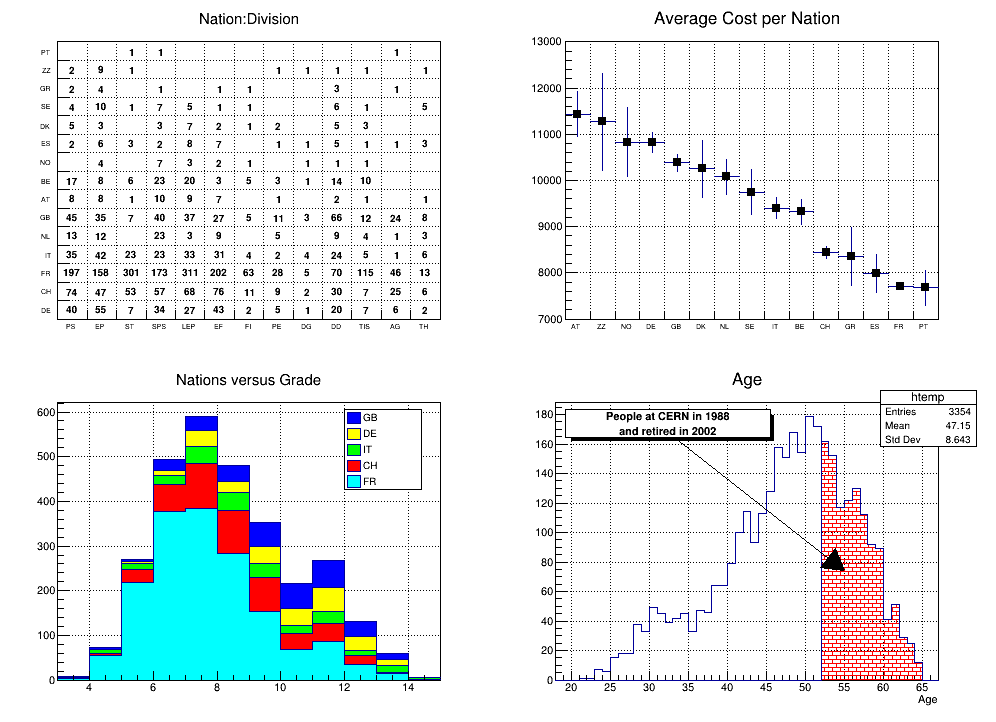

In [6]:
gROOT->GetListOfCanvases()->Draw()